In [ ]:
# Set up the environment with necessary imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# mount drive
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
DATA_DIRECTORY = "/content/drive/MyDrive/psych254a_2025/data"

# 1. Introduction to Statistical Models

## What is a Model?

A **model** is a parameterized function class - essentially a function that:

1. Takes inputs (data)
2. Applies transformations using parameters
3. Produces outputs (predictions)

Models allow us to represent patterns in data and make predictions about new observations.
In the simplest case, a model establishes a relationship between input variables (X) and output variables (Y).

## Implementing Models in PyTorch

PyTorch provides a powerful framework for defining and working with parameterized models through the `nn.Module` class.
A basic PyTorch model has the following components:

1. **Initialization** (`__init__`): Where we define model parameters and structure
2. **Forward pass** (`forward`): Where we implement the actual computation from inputs to outputs
3. **Parameters**: Special variables that can be optimized during training



## Implementing a Linear Model

Let's start by creating a synthetic data generator to work with.

In [ ]:
# Generate synthetic linear data with noise
torch.manual_seed(42)  # For reproducibility

# True parameters
true_w = 2.5  # slope
true_b = -1.0  # intercept

# Generate 100 points for x between -5 and 5
x = torch.linspace(-5, 5, 100)
# Generate y = w*x + b + noise
y = true_w * x + true_b + torch.normal(0, 1, size=(100,))

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Synthetic Linear Data", fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

Now, let's implement a linear model $y = wx + b$ as a PyTorch class.

In PyTorch, we define models by subclassing `nn.Module` and implementing two key methods:

1. `__init__`: Initialize the model and define parameters
2. `forward`: Define how inputs are transformed into outputs

Here's how we define a linear model:


In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        """
        Initialize the model with parameters w (weight) and b (bias).
        """
        super(LinearModel, self).__init__()

        # Define parameters as nn.Parameter objects so PyTorch can track them
        self.w = nn.Parameter(torch.tensor(0.0))  # Initialize with a default value

        # define the intercept term 'b' as a parameter
        ## YOUR CODE HERE ##

    def forward(self, x):
        """
        Implement the forward pass (getting outputs from inputs): y = wx + b

        Args:
            x: Input tensor

        Returns:
            y: Output tensor
        """
        ## YOUR CODE HERE ##

## Problem 1.1: Set Parameters and Make Predictions

In this toy example, we know the true parameter values. Let's set our model's parameters to these values
and see how well it matches the data.

1. Create a LinearModel instance
2. Set its parameters to the true values (which we know for this toy example)
3. Generate predictions for our x values
4. Plot the original data and the model predictions


In [ ]:
# Create a model instance
## YOUR CODE HERE ##
# linear_model =

# Set parameters to true values
linear_model.w.data = torch.tensor(true_w)
# set b to its true value
## YOUR CODE HERE ##

# Generate predictions by calling the forward method - no need to call class.forward(inputs), it is enough to call class(inputs)
## YOUR CODE HERE ##

In [ ]:
# Plot the data and the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(x, y_pred.detach().numpy(), "r-", linewidth=2, label="Model predictions")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Linear Model with True Parameters", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Working with Real Data: Self Regulation Ontology (SRO) Dataset

Now that we understand how to create a basic model in PyTorch, let's apply this knowledge to real data.
We'll work with the Self Regulation Ontology (SRO) dataset, which we talked about last class.

First, let's load the data:


In [ ]:
sro_datadir = os.path.join(DATA_DIRECTORY, "SRO")

individual_datadir = os.path.join(sro_datadir, "Individual_Measures")
df = pd.read_csv(os.path.join(individual_datadir, "threebytwo.csv.gz"), index_col=0)

In [ ]:
# Create average reaction time data
avg_rts = df[["worker_id", "rt"]].groupby("worker_id").mean()

In [ ]:
# Load health outcomes dataset
health = pd.read_csv(os.path.join(sro_datadir, "health.csv"), index_col=0)

In [ ]:
# Join the data (naturally uses the index column, which is subject)
joined = health.join(avg_rts)

## Problem 2.1: Modeling Depression Score and Days Lost Last Month

Let's explore the relationship between Depression Score and Days Lost Last Month.
We'll use the LinearModel class you defined earlier to model this relationship.

1. Extract the relevant data
2. Plot the scatter plot
3. Find suitable parameters for a linear model by manual adjustment
4. Overlay the model predictions on the scatter plot


In [ ]:
# Extract depression scores and days lost, dropping any NaN values
days_lost_col = "DaysLostLastMonth"
depression_col = "Depressed"
data = joined[[days_lost_col, depression_col]].dropna()

# Convert to PyTorch tensors
x_depression = torch.tensor(data[depression_col].values, dtype=torch.float32)
y_days_lost = torch.tensor(data[days_lost_col].values, dtype=torch.float32)

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_depression, y_days_lost, alpha=0.5)
plt.xlabel("Depression Score", fontsize=14)
plt.ylabel("Days Lost Last Month", fontsize=14)
plt.title("Depression Score vs. Days Lost Last Month", fontsize=16)
plt.grid(True, alpha=0.3)

# Calculate and display the correlation
correlation = np.corrcoef(data[depression_col], data[days_lost_col])[0, 1]
plt.annotate(
    f"Correlation: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7),
)

plt.show()

Now, create a linear model to fit the relationship between depression score and days lost last month.
Try different values for the parameters (slope and intercept) to get a good fit.


In [ ]:
# Create a fresh LinearModel instance
## YOUR CODE HERE ##
# depression_days_model =

# Set parameters by manual adjustment
# Try different values to find a good fit
## YOUR CODE HERE ##

# Generate predictions
## YOUR CODE HERE ##
# days_lost_pred =

In [ ]:
# Plot the data and model predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_depression, y_days_lost, alpha=0.5, label="Data")
plt.plot(
    x_depression,
    days_lost_pred.detach().numpy(),
    "r-",
    linewidth=2,
    label=f"Model: y = {depression_days_model.w.item():.3f}x + {depression_days_model.b.item():.3f}",
)
plt.xlabel("Depression Score", fontsize=14)
plt.ylabel("Days Lost Last Month", fontsize=14)
plt.title("Depression Score vs. Days Lost Last Month with Linear Model", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

## Problem 2.2: Modeling Reaction Time and Days Lost Last Month

Similarly, let's explore the relationship between reaction time and days lost last month.
Follow the same approach as before, by:

1. Plotting the scatter plot with correlation
2. Creating a LinearModel instance
3. Setting parameters manually to get a good fit
4. Overlaying the model predictions on the scatter plot


In [ ]:
# Extract reaction times and days lost, dropping any NaN values
days_lost_col = "DaysLostLastMonth"
rt_col = "rt"
data2 = joined[[days_lost_col, rt_col]].dropna()

# Convert to PyTorch tensors
x_rt = torch.tensor(data2[rt_col].values, dtype=torch.float32)
y_days_lost = torch.tensor(data2[days_lost_col].values, dtype=torch.float32)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_rt, y_days_lost, alpha=0.5)
plt.xlabel("Reaction Time (s)", fontsize=14)
plt.ylabel("Days Lost Last Month", fontsize=14)
plt.title("Reaction Time vs. Days Lost Last Month", fontsize=16)
plt.grid(True, alpha=0.3)

# Calculate and display the correlation
correlation = np.corrcoef(data2[rt_col], data2[days_lost_col])[0, 1]
plt.annotate(
    f"Correlation: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7),
)

plt.show()

In [ ]:
# Create a fresh LinearModel instance
## YOUR CODE HERE ##
# rt_days_model =

# Set parameters by manual adjustment
# Try different values to find a good fit
## YOUR CODE HERE ##

# Generate predictions
## YOUR CODE HERE ##
# days_lost_pred =

In [ ]:
# Plot the data and model predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_rt, y_days_lost, alpha=0.5, label="Data")
plt.plot(
    x_rt,
    days_lost_pred.detach().numpy(),
    "r-",
    linewidth=2,
    label=f"Model: y = {rt_days_model.w.item():.3f}x + {rt_days_model.b.item():.3f}",
)
plt.xlabel("Reaction Time (s)", fontsize=14)
plt.ylabel("Days Lost Last Month", fontsize=14)
plt.title("Reaction Time vs. Days Lost Last Month with Linear Model", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# 3. Modeling Language Development with Nonlinear Functions

Linear models are powerful, but many real-world phenomena follow nonlinear patterns.
Let's explore language development data from Wordbank, which typically follows a logistic growth pattern.

First, let's load and explore the data:


In [ ]:
# Load the Wordbank data
wordbank_data = pd.read_csv(os.path.join(DATA_DIRECTORY, "wordbank_bychild.csv"))
print("Wordbank data shape:", wordbank_data.shape)
print("\nColumns in Wordbank data:")
print(wordbank_data.columns.tolist())
print("\nFirst few rows:")
print(wordbank_data.head())

In [ ]:
# Get unique languages in the dataset
unique_languages = wordbank_data["language"].unique()
print(f"\nUnique languages in the dataset ({len(unique_languages)}):")
print(unique_languages[:10])  # Print first 10 languages if there are many

In [ ]:
# Filter for rows with non-null production values
wordbank_filtered = wordbank_data.dropna(subset=["production"])

# Calculate summary statistics by language and age
production_averages = {}

# Get summary stats for each language
for language in unique_languages:
    # Get data just for this language
    summary_data_by_child = wordbank_filtered[wordbank_filtered["language"] == language]

    # Skip languages with too little data
    if len(summary_data_by_child) < 10:
        continue

    # Produce summaries of the mean, std, and sample length, grouped by age bin
    prod_means = (
        summary_data_by_child[["age", "production"]]
        .groupby(["age"], as_index=False)
        .mean()
    )
    prod_stds = (
        summary_data_by_child[["age", "production"]]
        .groupby(["age"], as_index=False)
        .std()
    )
    prod_lens = (
        summary_data_by_child[["age", "production"]]
        .groupby(["age"], as_index=False)
        .agg(len)
    )

    # Get the independent variable
    ages = prod_means["age"]

    # Get the dependent variable mean
    means = prod_means["production"]

    # Get the dependent variable SEMs
    stds = prod_stds["production"]
    lens = prod_lens["production"]
    sems = stds / np.sqrt(lens)

    # Store computed things for future use
    production_averages[language] = (ages, means, sems)

In [ ]:
# Plot data for several languages
languages_to_plot = [
    "English (American)",
    "Spanish (Mexican)",
    "French (Quebecois)",
    "Mandarin (Beijing)",
    "Norwegian",
    "Swedish",
    "Italian",
    "Danish",
    "Japanese",
]

plt.figure(figsize=(18, 15))

for i, language in enumerate(languages_to_plot, 1):
    if language in production_averages:
        ages, means, sems = production_averages[language]

        plt.subplot(3, 3, i)
        plt.plot(ages, means)
        plt.fill_between(ages, means - sems, means + sems, alpha=0.3)
        plt.xlabel("Age (months)", fontsize=12)
        plt.ylabel("Words Produced", fontsize=12)
        plt.title(language, fontsize=14)
        plt.xlim(5, 40)
        plt.ylim(0, None)
    else:
        print(f"No data available for {language}")

plt.tight_layout()
plt.show()

## Problem 3.1: Implementing a Logistic Growth Model in PyTorch

Language acquisition typically follows a logistic growth pattern. Now, we'll implement a logistic growth model
as a PyTorch class, like we did with the linear model.

The logistic function has the form:

# $f(x) = \frac{c}{1 + e^{-b(x-a)}}$

Where:

- a: Midpoint (age at which production is 50% of maximum)
- b: Steepness (higher value = steeper curve)
- c: Maximum value (asymptote)

Implement the LogisticModel class below:


In [ ]:
class LogisticModel(nn.Module):
    """
    Logistic growth model with parameters a, b, and c.
    """

    ## YOUR CODE HERE ##

## Problem 3.2: Fit Logistic Model to English Language Data

Now let's use our LogisticModel to fit the English (American) language data:


In [ ]:
# Extract another language's data
language = "English (American)"
ages, means, sems = production_averages[language]

# Convert to PyTorch tensors
ages_tensor = torch.tensor(
    ages.values, dtype=torch.float32
)  # this is our independent variable
means_tensor = torch.tensor(
    means.values, dtype=torch.float32
)  # this is our dependent variable

## YOUR CODE HERE ##

# Create a logistic model instance
# english_model =

# Set parameters by manual adjustment
# Adjust them to fit the data better

# Generate predictions on a smoother grid for plotting
x_smooth = torch.linspace(min(ages), max(ages), 100)
# y_pred =

In [ ]:
# Plot the data and model predictions
plt.figure(figsize=(12, 8))
plt.errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
plt.plot(
    x_smooth.numpy(),
    y_pred.detach().numpy(),
    "r-",
    linewidth=2,
    label=f"Logistic model (a={english_model.a.item():.1f}, b={english_model.b.item():.3f}, c={english_model.c.item():.1f})",
)

plt.title(f"{language} - Language Production Growth", fontsize=16)
plt.xlabel("Age (months)", fontsize=14)
plt.ylabel("Words Produced", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Problem 3.3: Fit Logistic Model to Another Language

Choose another language from the dataset and fit a logistic growth model to it.
Compare the parameters with those of English to see if the functional form of language acquisition differs across languages.


In [ ]:
# Extract another language's data
language = "Catalan" # change to any language you want
ages, means, sems = production_averages[language]

# Convert to PyTorch tensors
ages_tensor = torch.tensor(
    ages.values, dtype=torch.float32
)  # this is our independent variable
means_tensor = torch.tensor(
    means.values, dtype=torch.float32
)  # this is our dependent variable

## YOUR CODE HERE ##

# Create a logistic model instance
# second_language_model =

# Set parameters by manual adjustment
# Adjust them to fit the data better

# Generate predictions on a smoother grid for plotting
x_smooth = torch.linspace(min(ages), max(ages), 100)
# y_pred =

In [ ]:
# Plot the data and model predictions
plt.figure(figsize=(12, 8))
plt.errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
plt.plot(
    x_smooth.numpy(),
    y_pred.detach().numpy(),
    "r-",
    linewidth=2,
    label=f"Logistic model (a={second_language_model.a.item():.1f}, b={second_language_model.b.item():.3f}, c={second_language_model.c.item():.1f})",
)

plt.title(f"{language} - Language Production Growth", fontsize=16)
plt.xlabel("Age (months)", fontsize=14)
plt.ylabel("Words Produced", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing Language Acquisition Across Languages

After fitting models to multiple languages, consider:

1. Do all languages follow a logistic growth pattern?
2. Do languages differ in:
   - The age at which children reach 50% vocabulary (parameter a)?
   - The rate of vocabulary acquisition (parameter b)?
   - The maximum vocabulary size (parameter c)?
3. What might explain any differences you observe?

Try modeling a few more languages and compare their parameters!


# 4. Introduction to Loss Functions

## How Did You Know Your Fit Was Good?

When manually adjusting parameters for our models, you likely made decisions based on how well the curve matched the data visually. This intuitive approach works for simple cases, but we need a more systematic way to evaluate model performance.

**Loss functions** provide a quantitative measure of how well a model's predictions match the actual data. They:

1. Assign a numerical score to the model's performance (lower is typically better)
2. Guide optimization algorithms to find optimal parameters
3. Allow objective comparison between different models


## Problem 4.1: Implement the Squared Loss Function

Implement the most common loss function for regression problems: **Mean Squared Error (MSE)**.
This function calculates the average of the squared differences between predictions and targets.


In [ ]:
def squared_loss(predictions, targets):
    """
    Compute the mean squared error loss between predictions and targets.

    Args:
        predictions: Tensor of model predictions
        targets: Tensor of actual target values

    Returns:
        Mean squared error loss
    """
    ## YOUR CODE HERE ##

## Problem 4.2: Evaluate Model Performance with Loss Functions

Let's evaluate our logistic model fit for language acquisition data using the squared loss function.
We'll visualize the model predictions and compute the loss value.


In [ ]:
# Evaluate English model with loss function
language = "English (American)"
ages, means, sems = production_averages[language]

# Convert to PyTorch tensors
ages_tensor = torch.tensor(ages.values, dtype=torch.float32)
means_tensor = torch.tensor(means.values, dtype=torch.float32)

## YOUR CODE HERE ##
# Create a logistic model instance
# english_model =

# Set parameters to our previously found values
## YOUR CODE HERE ##

# Generate predictions
## YOUR CODE HERE ##
#predictions =

# Calculate loss
## YOUR CODE HERE ##
#loss_value =

In [ ]:
# Plot the model fit with loss value
plt.figure(figsize=(10, 6))
plt.errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
plt.plot(
    ages,
    predictions.detach().numpy(),
    "r-",
    linewidth=2,
    label=f"Model (a={english_model.a.item():.1f}, b={english_model.b.item():.3f}, c={english_model.c.item():.1f})",
)
plt.title(f"{language} - Model Fit (MSE Loss: {loss_value.item():.1f})", fontsize=14)
plt.xlabel("Age (months)", fontsize=12)
plt.ylabel("Words Produced", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## Problem 4.3: Comparing Different Parameter Values

Now, let's compare three different sets of parameters for our logistic model:

1. Poor fit (high loss)
2. Medium fit (moderate loss)
3. Good fit (low loss)

Define three different parameter sets and evaluate their performance using our loss function.


In [ ]:
# Define three sets of parameters for comparison
## YOUR CODE HERE ##
parameter_sets = [
    {"name": "Poor Fit", "a": 0.0, "b": 0.0, "c": 0.0},  # Poor fit
    {"name": "Medium Fit", "a": 0.0, "b": 0.0, "c": 0.0},  # Medium fit
    {"name": "Good Fit","a": 0.0, "b": 0.0, "c": 0.0},  # Good fit (from previous example)
]

In [ ]:
# Extract English data (reusing from before)
language = "English (American)"
ages, means, sems = production_averages[language]

# Convert to PyTorch tensors
ages_tensor = torch.tensor(ages.values, dtype=torch.float32)
means_tensor = torch.tensor(means.values, dtype=torch.float32)

# Create figure for comparing all three parameter sets
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Evaluate each parameter set
for i, params in enumerate(parameter_sets):
    # Create model with these parameters
    model = LogisticModel()
    with torch.no_grad():
        model.a.data = torch.tensor(params["a"])
        model.b.data = torch.tensor(params["b"])
        model.c.data = torch.tensor(params["c"])

    # Generate predictions
    predictions = model(ages_tensor)

    # Calculate loss
    loss_value = squared_loss(predictions, means_tensor)

    # Plot model fit
    axs[i].errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
    axs[i].plot(
        ages,
        predictions.detach().numpy(),
        "r-",
        linewidth=2,
        label=f'a={params["a"]}, b={params["b"]:.2f}, c={params["c"]}',
    )
    axs[i].set_title(
        f"{params['name']} (MSE Loss: {loss_value.item():.1f})", fontsize=14
    )
    axs[i].set_xlabel("Age (months)", fontsize=12)
    axs[i].set_ylabel("Words Produced", fontsize=12)
    axs[i].legend(fontsize=10)
    axs[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Problem 4.4: Design Your Own Loss Function

Loss functions can be designed to capture different aspects of model performance. For example:

- **MAE (Mean Absolute Error)**: Measures average absolute deviation
- **Huber Loss**: Less sensitive to outliers than MSE
- **Custom losses**: Can incorporate domain-specific knowledge

Implement a different loss function and compare model performance using our three parameter sets.


In [ ]:
def my_loss_func(predictions, targets):
    """
    Create your own loss function!

    Args:
        predictions: Tensor of model predictions
        targets: Tensor of actual target values

    Returns:
        loss
    """
    ## YOUR CODE HERE ##

In [ ]:
# Evaluate the same three parameter sets with the new loss function
if language in production_averages:
    # Create figure for comparing all three parameter sets with new loss
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # Evaluate each parameter set
    for i, params in enumerate(parameter_sets):
        # Create model with these parameters
        model = LogisticModel()
        with torch.no_grad():
            model.a.data = torch.tensor(params["a"])
            model.b.data = torch.tensor(params["b"])
            model.c.data = torch.tensor(params["c"])

        # Generate predictions
        predictions = model(ages_tensor)

        # Calculate both losses for comparison
        mse_value = squared_loss(predictions, means_tensor)
        mae_value = my_loss_func(predictions, means_tensor)

        # Plot model fit
        axs[i].errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
        axs[i].plot(
            ages,
            predictions.detach().numpy(),
            "r-",
            linewidth=2,
            label=f'a={params["a"]}, b={params["b"]:.2f}, c={params["c"]}',
        )
        axs[i].set_title(
            f"{params['name']} (my loss func: {mae_value.item():.1f}, MSE: {mse_value.item():.1f})",
            fontsize=14,
        )
        axs[i].set_xlabel("Age (months)", fontsize=12)
        axs[i].set_ylabel("Words Produced", fontsize=12)
        axs[i].legend(fontsize=10)
        axs[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## Problem 4.5: Design a "Bad" Loss Function

Now, let's create a "bad" loss function where better fits counterintuitively result in higher loss values.
This illustrates why the design of loss functions is critical.


In [ ]:
def my_bad_loss_func(predictions, targets):
    """
    Create your own loss function!

    Args:
        predictions: Tensor of model predictions
        targets: Tensor of actual target values

    Returns:
        loss
    """
    ## YOUR CODE HERE ##

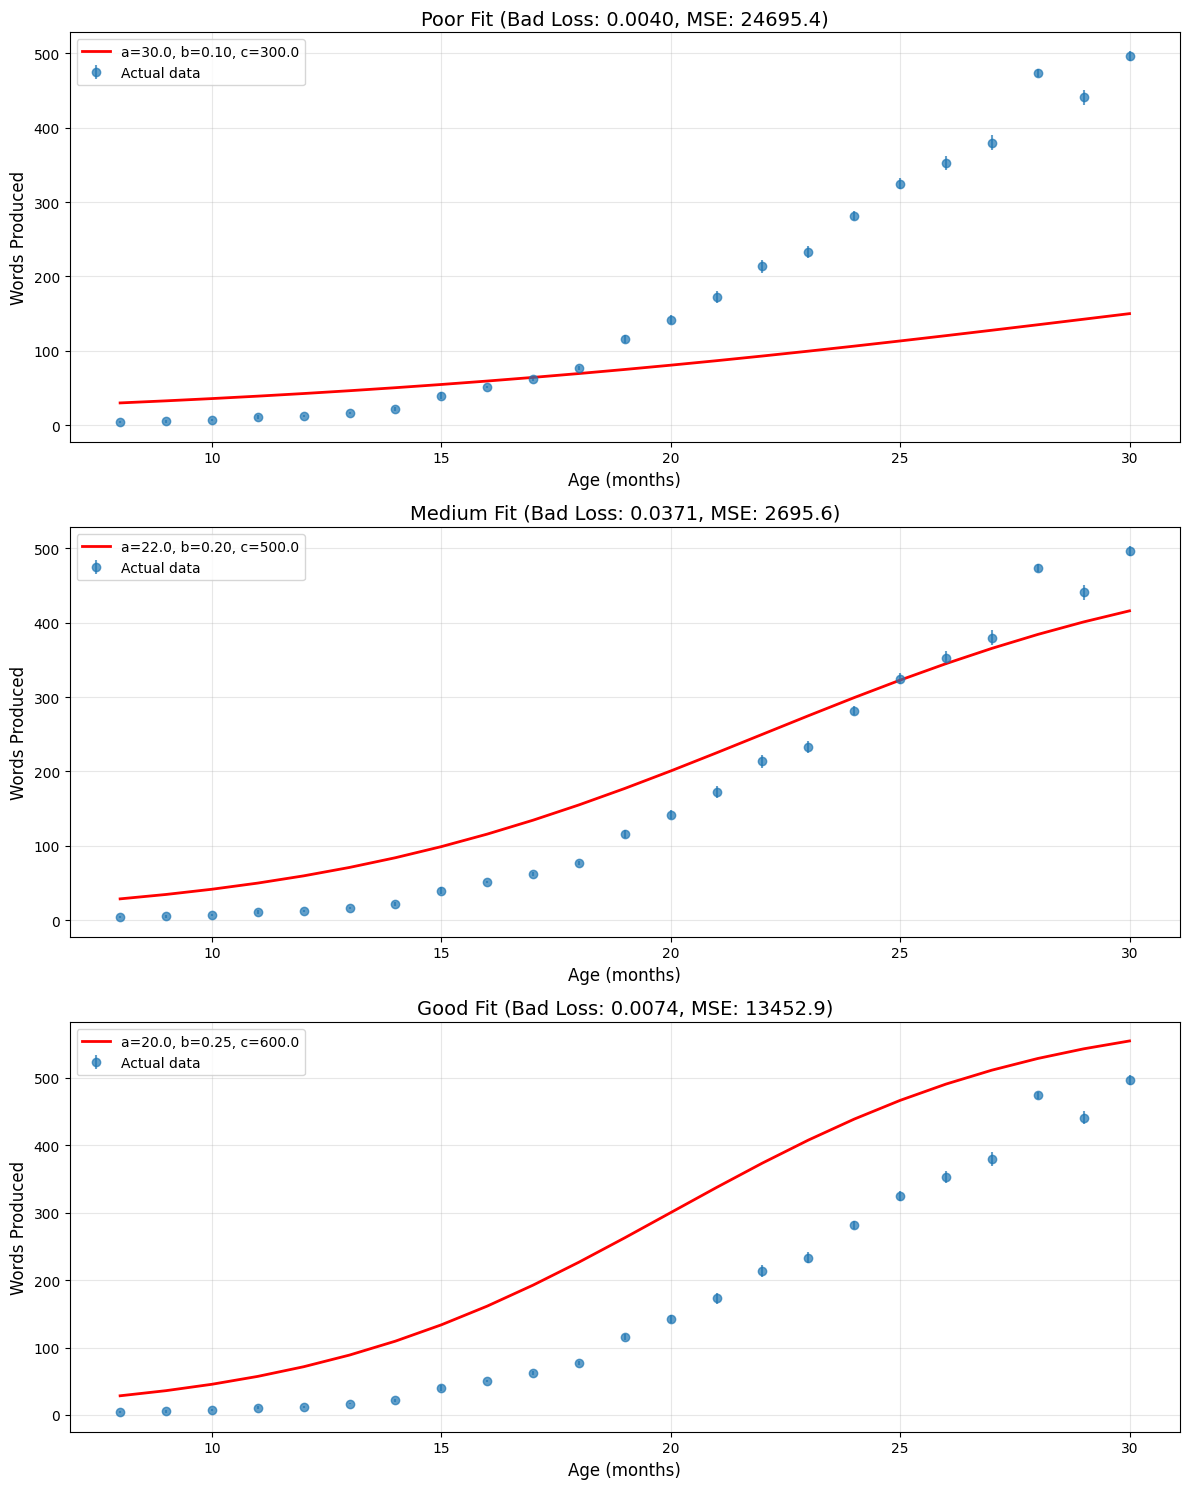

In [ ]:
# Evaluate the same three parameter sets with the "bad" loss function
if language in production_averages:
    # Create figure for comparing all three parameter sets with bad loss
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # Evaluate each parameter set
    for i, params in enumerate(parameter_sets):
        # Create model with these parameters
        model = LogisticModel()
        with torch.no_grad():
            model.a.data = torch.tensor(params["a"])
            model.b.data = torch.tensor(params["b"])
            model.c.data = torch.tensor(params["c"])

        # Generate predictions
        predictions = model(ages_tensor)

        # Calculate losses
        mse_value = squared_loss(predictions, means_tensor)
        bad_loss_value = my_bad_loss_func(predictions, means_tensor)

        # Plot model fit
        axs[i].errorbar(ages, means, yerr=sems, fmt="o", alpha=0.7, label="Actual data")
        axs[i].plot(
            ages,
            predictions.detach().numpy(),
            "r-",
            linewidth=2,
            label=f'a={params["a"]}, b={params["b"]:.2f}, c={params["c"]}',
        )
        axs[i].set_title(
            f"{params['name']} (Bad Loss: {bad_loss_value.item():.4f}, MSE: {mse_value.item():.1f})",
            fontsize=14,
        )
        axs[i].set_xlabel("Age (months)", fontsize=12)
        axs[i].set_ylabel("Words Produced", fontsize=12)
        axs[i].legend(fontsize=10)
        axs[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## How Do We Minimize Loss Automatically?

So far, we've been manually adjusting parameters and observing the resulting loss. This approach works for simple models with few parameters, but becomes impractical for complex models with many parameters.

In the next classes, we'll explore how to:

1. Use **gradient descent** to automatically find optimal parameters
2. Leverage PyTorch's **autograd** system for automatic differentiation
3. Implement **optimization algorithms** to efficiently minimize loss functions

These techniques form the foundation of modern machine learning and will allow us to train much more complex models than we could by hand.
